# Oracle: Median Following

Keeps the car on the track median with variable look ahead time.

In [1]:
from DriveItGym import *
import numpy as np
from numpy import pi

num_episodes = 1  # number of episodes to run
time_limit = 10.0
throttle_limit = 1.0
gamma = 0.98
epsilon = 0.00
look_ahead = 0.2 # [-0.03, 0.37], 0.16 for the median, 0.34 optimal
kp = np.array((0.1, 1.0, 0.5)) * 4.0 # lateral, heading, steer
trl = 2.3 + (0.35 - look_ahead) * (3.1 - 2.3) / (0.34 - 0.00)
random_position=False

env = DriveItEnv(time_limit, throttle_limit, gamma, \
                 show_belief_state=True, trail_length=trl)
observation = env._reset(random_position)
done = False
reward_episode = 0
reward_sum = 0.0

for i_episode in range(1, num_episodes + 1):
    trace = []
    obs = []
    states = []
    props = []
    errs = []
    while not done:
        if num_episodes < 2:
            env.render()

        x_m, y_m, theta, steer, v = observation
        s = env.state
        true_xm, true_ym = s[5] / checkpoint_median_length, s[6] / half_track_width
        theta_, steer_ = env._median_properties(x_m * checkpoint_median_length + look_ahead)
        err = (y_m, canonical_angle(theta * pi - theta_) / pi, steer - steer_)
        
        trace.append(err)
        obs.append(observation)
        states.append((true_xm, true_ym))
        props.append((theta_ / pi, steer_))
        errs.append((x_m - true_xm, y_m - true_ym))
        
        f = np.inner(kp, err)
        if f < -epsilon: action = 1
        elif f > epsilon: action = 2
        else: action = 0

        if v < throttle_limit:
            action += 3

        observation, reward, done, info = env.step(action)
        reward_episode += reward

    if num_episodes <= 10 or info['done'] != 'complete':
        print('Episode %d %s. reward: %f, laps: %f' % \
              (i_episode, info['done'], reward_episode, \
               reward_episode / lap_median_length))
    reward_sum += reward_episode
    reward_episode = 0
    observation = env._reset(random_position)
    done = False

print('Average reward: %f' %(reward_sum / num_episodes))

Episode 1 out. reward: 2.908979, laps: 0.577833
Average reward: 2.908979


In [7]:
env.close()

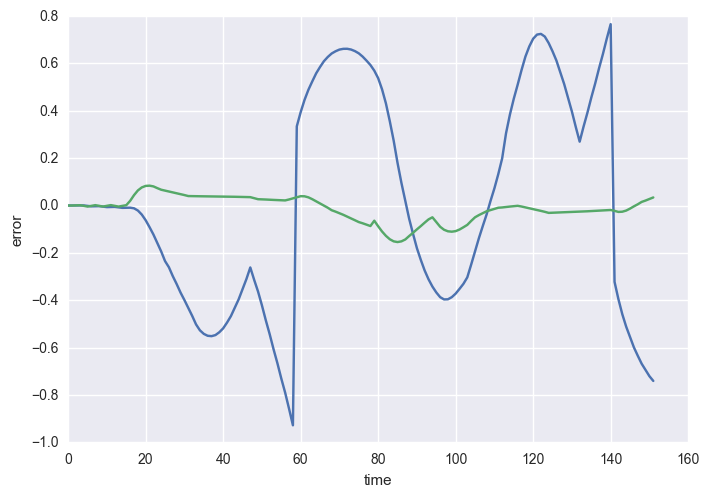

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline
sns.set()
plt.plot([t[0] for t in trace])
plt.plot([t[1] for t in trace])
#plt.plot(trace)
plt.xlabel('time');plt.ylabel('error')

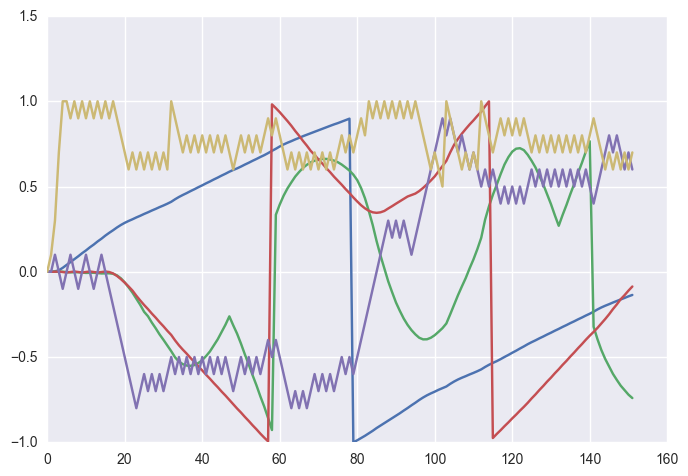

In [3]:
plt.plot(obs)

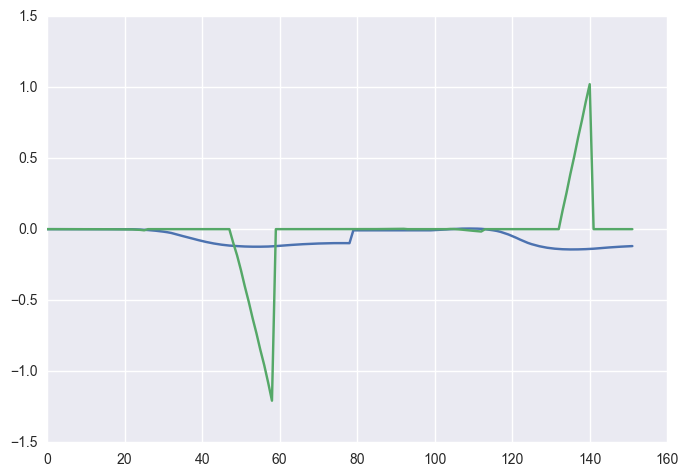

In [4]:
plt.plot(errs)

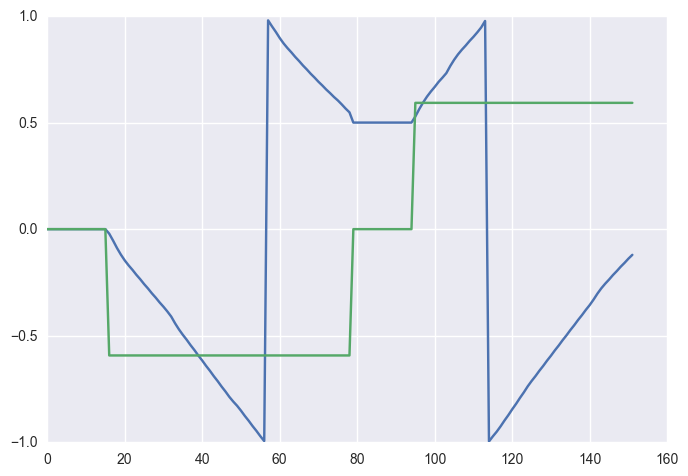

In [5]:
plt.plot(props)

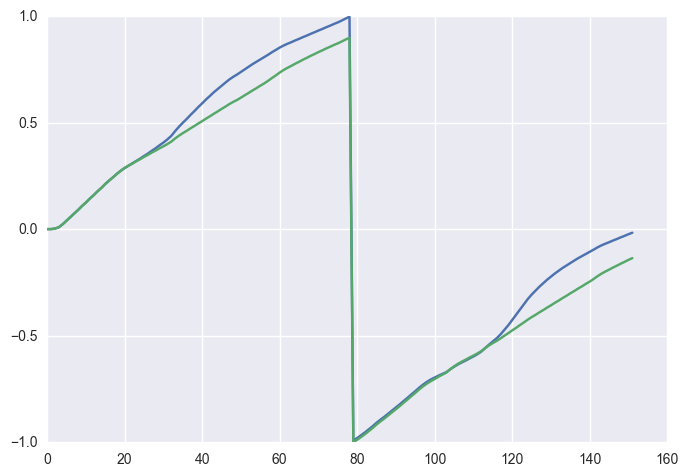

In [6]:
i = 0
plt.plot([s[i] for s in states])
plt.plot([o[i] for o in obs])

In [22]:
env._reset(random_position=True)

array([ 0.66183879, -0.10445375, -0.79514576, -0.49259259])

In [23]:
env.render()

In [5]:
np.linspace(0.0, 1.2, 10)

array([ 0.        ,  0.13333333,  0.26666667,  0.4       ,  0.53333333,
        0.66666667,  0.8       ,  0.93333333,  1.06666667,  1.2       ])

In [14]:
checkpoint_median_length

2.517145867644259